#УЧП параболического типа

В этом разделе рассмотрим какими методами можно численно решать уравнение параболического типа с постоянным коэффициентом $a$:

$$
\frac{\partial u\left(t, x\right)}{\partial t}=a \frac{\partial^2 u\left(t, x\right)}{\partial x^2}+f(t, x), \quad t \in[0, \mathrm{~T}], \quad x \in[0, X],
$$
для которого заданы начальные и граничные условия:

$$
u(0, x)=u_0(x), \quad u(t, 0)=\mu_1(t),  \quad u(t, X)=\mu_2(t).
$$



##Разностные схемы

Используя формулы численного дифференцирования можно построить разностное уравнение, соответствующее исходному.

В простейшем случае при $\tau, h \to 0$:

$$
\left.\frac{\partial u}{\partial t}\right|_{t=t_0, x=x_0}\approx\frac{u(t_0+\tau, x_0) - u(t_0, x_0)}{\tau}\approx\frac{u(t_0, x_0) - u(t_0-\tau, x_0)}{\tau},
$$

$$
\left.\frac{\partial^2 u}{\partial x^2}\right|_{t=t_0, x=x_0}\approx\frac{u(t_0, x-h)-2 u(t_0, x)+u(t_0, x+h)}{h^2}.
$$

Тем самым получаем два способа аппроксимации исходного уравнения разностным:

$$
    \frac{u_m^{n+1}-u_m^n}{\tau}=a \cdot \frac{u_{m-1}^n-2 u_m^n+u_{m+1}^n}{h^2}+f_m^n
$$

$$
    \frac{u_m^{n+1}-u_m^n}{\tau}=a \frac{u_{m-1}^{n+1}-2 u_m^{n+1}+u_{m+1}^{n+1}}{h^2}+f_m^n
$$



Не забываем про аппроксимацию начальных и граничных условий:

$$
    u_m^0=u_0(mh), \quad u_0^n=\mu_1(n\tau), \quad u_M^n=\mu_2(n\tau)
$$


Обе схемы имеют порядок аппроксимации $O(h^2 + \tau).$

Проведя несложные преобразования из первого уравнения можно получить:

$$
u_m^{n+1} = u_m^n + \frac{a\tau}{h^2} (u_{m-1}^n - 2u_m^n + u_{m+1}^n) + \tau f_m^{n+1}.
$$

То есть зная решение на предыдущем временном слое, можно отыскать решение на следующем. В силу этого рассмотренная схема называется явной. Данная схема устойчива при значениях параболического числа Куранта $\sigma=\frac{a \tau}{h^2} \leq \frac{1}{2}$.



Из второго уравнения следует:

$$
-\frac{a\tau}{h^2} u_{m-1}^{n+1} + \left( 1 + \frac{2a\tau}{h^2} \right) u_m^{n+1} - \frac{a\tau}{h^2} u_{m+1}^{n+1} = u_m^n + \tau f_m^{n+1}.
$$

Что при известных $u_m^n$ по сути является системой линейных уравнений относительно вектора $(u_1^{n+1}, \dots, u_{M-1}^{n+1})^T$ с трёхдиагональной матрицей коэффициентов. Такие системы можно решать методом прогонки. Неявная схема устойчива безусловно.




Другим примером схемы, часто используемой при решении УЧП параболического типа, служит схема Кранка-Николсона, которая является безусловно устойчивой и имеет порядок аппроксимации $O(h^2 + \tau)$. В этом случае разностное уравнение имеет вид:

$$
    \frac{u_m^{n+1}-u_m^n}{\tau}=f_m^n+ \frac{a}{2}\left(\frac{u_{m-1}^n-2 u_m^n+u_{m+1}^n}{h^2}+\frac{u_{m-1}^{n+1}-2 u_m^{n+1}+u_{m+1}^{n+1}}{h^2}\right).
$$



##Метод прогонки

Для разностных уравнений вида

$$
a_n x_{n-1} - b_n x_n + c_n x_{n+1} = d_n
$$
с учётом граничных условий можно получить следующую систему линейных алгебраических уравнений:

$$
\begin{cases}
-b_0 x_0 + c_0 x_1 = d_0, \\
a_n x_{n-1} - b_n x_n + c_n x_{n+1} = d_n, & n = 1, 2, \ldots, N-1, \\
a_N x_{N-1} - b_N x_N = d_N,
\end{cases}
$$

Эта система уравнений задаётся трёхдиагональной матрицей:

$$
\begin{pmatrix}
-b_0 & c_0 & 0 & \cdots & 0 \\
a_1 & -b_1 & c_1 & \cdots & 0 \\
0 & a_2 & -b_2 & \cdots & 0 \\
\vdots & \vdots & \vdots & \ddots & c_{N-1} \\
0 & 0 & 0 & a_N & -b_N \\
\end{pmatrix}
$$

Системы такого вида можно решать эффективней используя метод прогонки. В таком случае решение ищется в форме прогоночного соотношения:

$$
x_{n-1} = P_n x_n + Q_n, \quad n = 1, 2, \ldots, N,
$$
где $P_n$ и $Q_n$ — прогоночные коэффициенты.

Алгоритм начинается с прямой прогонки, значения $P_1$ и $Q_1$ определяются из левого граничного условия: $P_1=\frac{c_0}{b_0}$, $Q_1=-\frac{d_0}{b_0}$. А затем из них по рекуррентным формулам вычисляются значения прогоночных коэффициентов вплоть до $P_N$ и $Q_N$:

$$
P_{n+1} = \frac{c_n}{b_n - a_n P_n}, \quad Q_{n+1} = \frac{a_n Q_n - d_n}{b_n - a_n P_n}.
$$

После следует процесс обратной прогонки. Для этого из правого граничного условия и прогоночного соотношения находится $x_N$:

$$
x_N = \frac{a_N Q_N - d_N}{b_N - a_N P_N},
$$

и потом по прогоночному соотношению вычисляются остальные значения $x_n$:

$$
x_{n-1} = P_n x_n + Q_n, \quad n = 1, 2, \ldots, N.
$$




##Уравнение теплопроводности

В отсутствии источников и стоков тепла уравнение теплопроводности для тонкого стержня имеет вид:

$$
\frac{\partial u}{\partial t}=\alpha \frac{\partial^2 u}{\partial x^2},
$$
где $\alpha$ -- коэффициент теплопроводности материала, из которого изготовлен стержень.


Для решения этого уравнения необходимо задать начальные и граничные условия:

$$
u(0, x)=u_0(x), \quad u(t, 0)=\mu_1(t),  \quad u(t, X)=\mu_2(t).
$$

Решим уравнение используя схему Кранка-Николсона и метод прогонки. Для этого придется для $n = 1, 2, \ldots, N-1,$ решать систему линейных уравнений вида:

$$
\begin{cases}
u_0^{n+1} =\mu_{1, n+1}, \\
-ru_{m-1}^{n+1}+(1+2r)u_{m}^{n+1}-ru_{m+1}^{n+1}=ru_{m-1}^{n}+(1-2r)u_{m}^{n}+ru_{m+1}^{n},   \\
u_{M-1}^{n+1} =\mu_{2, n+1},
\end{cases}
$$
где $r=\frac{\alpha \tau}{2h^2}$ -- число Куранта.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from tqdm.notebook import tqdm

class HeatEquationSolver:
    def __init__(self, a, L, T, Nx, Nt, u0, ul, ur, f):
        self.a = a  # Thermal diffusivity

        self.L = L  # Total lenght
        self.T = T  # Total time
        self.Nx = Nx  # Number of spatial steps
        self.Nt = Nt  # Number of time steps
        self.h = L / (Nx - 1)  # Spatial step size
        self.tau = T / (Nt - 1)  # Time step size
        self.x = np.linspace(0, L, Nx)  # Spatial grid
        self.t = np.linspace(0, T, Nt)  # Time grid
        self.r = self.a * self.tau / (2 * self.h**2) # Courant number

        self.u = np.zeros((Nt, Nx))  # Solution matrix

        self.u0 = u0  # Initial condition function
        self.ul = ul  # Left boundary condition function
        self.ur = ur  # Right boundary condition function

        # Set initial and boundary conditions
        self.u[0, :] = self.u0(self.x)
        self.u[:, 0] = self.ul(self.t)
        self.u[:, -1] = self.ur(self.t)

        self.f = f  # Source function


    def TridiagonalMatrixAlgorithm(self, a, b, c, d):
        n = len(d)
        p = np.zeros(n-1)
        q = np.zeros(n)
        x = np.zeros(n)

        # Forward sweep
        p[0] = c[0] / b[0]
        q[0] = - d[0] / b[0]

        for i in range(1, n-1):
            p[i] = c[i] / (b[i] - a[i-1] * p[i-1])
        for i in range(1, n):
            q[i] = (a[i-1] * q[i-1] - d[i]) / (b[i] - a[i-1] * p[i-1])

        # Back substitution
        x[-1] = q[-1]
        for i in range(n-2, -1, -1):
            x[i] = p[i] * x[i + 1] + q[i]

        return x


    def solve(self):
        A = np.zeros((self.Nx, self.Nx))
        for i in range(1, self.Nx - 1):
            A[i, i] = 1 + 2 * self.r
            A[i, i - 1] = -self.r
            A[i, i + 1] = -self.r
        A[0, 0] = 1
        A[-1, -1] = 1

        B = np.zeros((self.Nx, self.Nx))
        for i in range(1, self.Nx - 1):
            B[i, i] = 1 - 2 * self.r
            B[i, i - 1] = self.r
            B[i, i + 1] = self.r

        for n in tqdm(range(1, self.Nt)):
            b = np.zeros(self.Nx)
            b[0] = self.ul(self.t[n])
            b[-1] = self.ur(self.t[n])
            b[1:-1] = self.tau * self.f(self.t[n - 1], self.x[1:-1])

            d = B @ self.u[n - 1] + b
            self.u[n, :] = self.TridiagonalMatrixAlgorithm(A.diagonal(offset=-1), -A.diagonal(offset=0), A.diagonal(offset=1), d)


    def plot(self):
        fig, ax = plt.subplots()
        for n in range(0, self.Nt, 5):
            color = cm.jet(n / self.Nt)
            ax.plot(self.x, self.u[n, :], color=color, label=f"t={self.t[n]:.2f}")
        ax.set_xlabel("x")
        ax.set_ylabel("u")
        norm = plt.Normalize(0, self.T)
        cmap = cm.jet
        sm = plt.cm.ScalarMappable(norm=norm, cmap=cmap)
        sm.set_array([])
        cbar = fig.colorbar(sm)
        cbar.ax.set_ylabel("Time")
        plt.show()

  0%|          | 0/99 [00:00<?, ?it/s]

<ipython-input-1-a7edaf6bad2f>:93: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = fig.colorbar(sm)


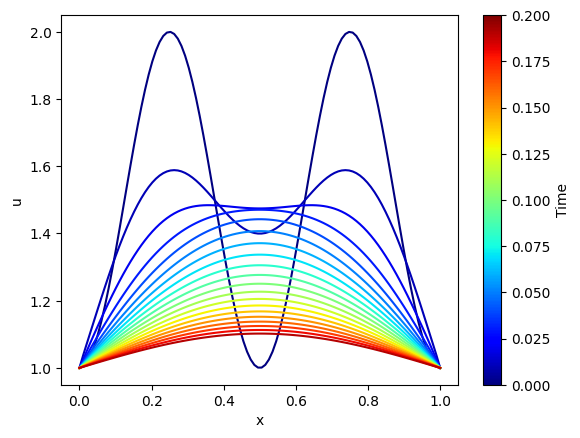

In [ ]:
def u0(x):
    return 1 + np.sin(2 * np.pi * x / 1.0)**2

def ul(t):
    return 1

def ur(t):
    return 1

def f(t, x):
    return 0


solver = HeatEquationSolver(a=1.0, L=1.0, T=0.2, Nx=100, Nt=100, u0=u0, ul=ul, ur=ur, f=f)
solver.solve()
solver.plot()